In [375]:
import torch

from torchvision.models import vgg16

import matplotlib.pyplot as plt

%matplotlib inline

import cv2

import torch.nn as nn

import torchvision.transforms as transforms

In [267]:
model = vgg16(pretrained = True)

model.features

/Users/ojasgupta/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ojasgupta/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [310]:
model.features[2].weight.shape

torch.Size([64, 64, 3, 3])

In [343]:
image = './data/cat.jpg'

In [344]:
image = cv2.imread(image)

In [345]:
image.shape

(482, 477, 3)

In [346]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.resize(image, (224, 224))

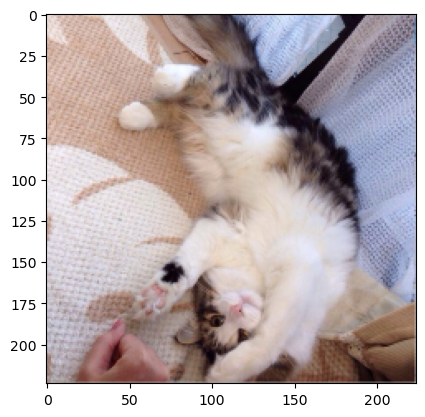

In [347]:
plt.imshow(image)

In [348]:
model.features[0], model.features[1], model.features[2], model.features[3], model.features[4],

(Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))

In [349]:
Model = nn.Sequential(

    model.features[0],
    ReLU(inplace=True),
    Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
    ReLU(inplace=True),

)

NameError: name 'ReLU' is not defined

In [350]:
imd = torch.from_numpy(image)

In [351]:
imd = imd.to(torch.float32)

In [352]:
imd = imd.unsqueeze_(0)

imd = imd.permute(0, 3, 1, 2)

In [353]:
imd.shape

torch.Size([1, 3, 224, 224])

In [354]:
y = Model(imd)

In [355]:
y.shape

torch.Size([1, 64, 224, 224])

In [356]:
y = y.squeeze_(0)

In [357]:
y.shape

torch.Size([64, 224, 224])

In [358]:
y

tensor([[[ 5.1319e+01,  1.9946e+01,  3.0995e+01,  ...,  2.2288e+01,
           2.3379e+01,  8.9609e+00],
         [ 5.7923e+01,  1.1959e+01,  2.2212e+01,  ...,  1.5531e+01,
           1.7343e+01, -3.1616e+00],
         [ 6.3579e+01,  1.9781e+01,  1.3735e+01,  ...,  1.8987e+01,
          -1.8658e+01,  3.5696e+00],
         ...,
         [ 7.4710e+01, -1.1026e+01, -1.7903e+01,  ...,  1.6070e+01,
           6.9074e-01, -5.1591e+01],
         [ 6.0928e+01, -5.9052e+00, -1.0272e+01,  ...,  1.1823e+01,
           1.2064e+00, -4.3985e+01],
         [ 6.3001e+01,  1.0401e+01,  6.3234e+00,  ...,  2.4789e+01,
           1.8224e+01,  2.3988e+00]],

        [[ 5.6301e+02,  1.3321e+02,  9.4617e+01,  ...,  4.2996e+01,
           1.7888e+02, -2.1904e+02],
         [ 5.5707e+02,  6.1465e+01, -2.5370e+01,  ...,  2.5204e+00,
           3.9657e+01, -3.5645e+02],
         [ 5.4350e+02,  4.8437e-02, -1.8050e+01,  ..., -2.7349e+01,
           2.4988e+01, -3.6519e+02],
         ...,
         [ 3.2825e+02, -6

In [359]:
Model2 = nn.Sequential(
    
#     nn.MaxUnpool2d(kernel_size=2, stride=2, padding=0),
    nn.ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
    
    
    nn.ConvTranspose2d(in_channels=64, out_channels=3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
    
    
    
)

In [360]:
y = y.squeeze_(0)

In [361]:
y.shape

torch.Size([64, 224, 224])

In [362]:
y = Model2(y)

In [363]:
y.shape

torch.Size([3, 224, 224])

In [364]:
y = y.squeeze_(0)

In [365]:
y.shape

torch.Size([3, 224, 224])

In [366]:
y = y.permute(1, 2, 0)

y.shape

torch.Size([224, 224, 3])

In [367]:
from matplotlib.colors import rgb_to_hsv

In [368]:
gray_image = rgb_to_hsv(y.detach().numpy())[:, :, 2]

gray_image.shape

(224, 224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


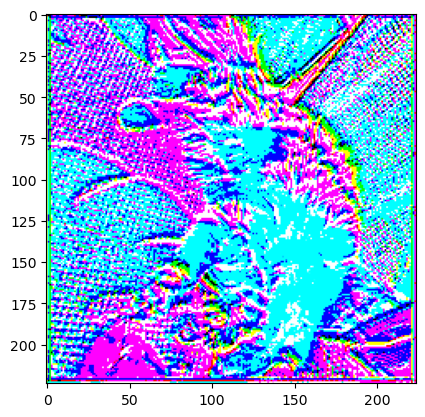

In [369]:
plt.imshow(y.detach().numpy(), cmap = "gray")

In [440]:
image = cv2.imread("./data/cat.jpg")

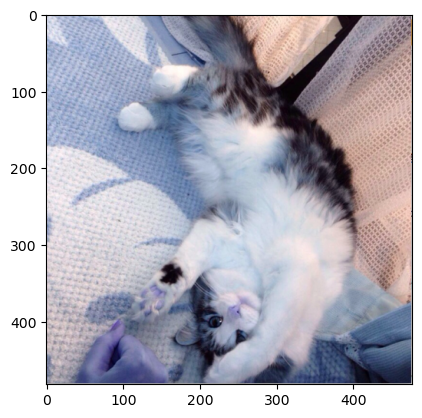

In [441]:
plt.imshow(image)

In [448]:
layer = model.features[0];

type(image)

torch.Tensor

In [449]:
transform = transforms.Compose([
    
    transforms.ToTensor(),
    
    transforms.Resize((224, 224)),
    
])

In [450]:
image = transform(image)

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [451]:
image.shape

torch.Size([3, 224, 224])

In [452]:
type(layer)

torch.nn.modules.conv.Conv2d

In [453]:
y = layer(image)

In [454]:
y.shape

torch.Size([64, 224, 224])

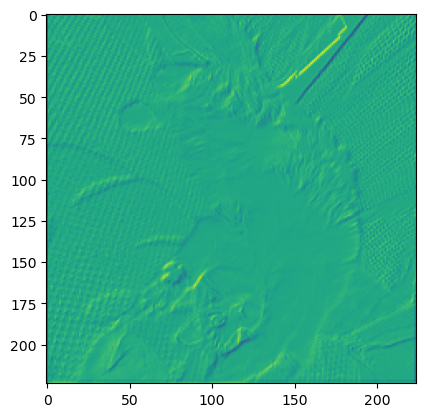

In [455]:
for i in range(40):
    
    img = y[i, :, :]
    
    img = img.unsqueeze_(2)
    
    plt.imshow(img.detach().numpy())
    
    

In [456]:
layer1 = model.features[2]

In [457]:
layer1

Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [458]:
y1 = layer1(y)

In [460]:
y1.shape

torch.Size([64, 224, 224])

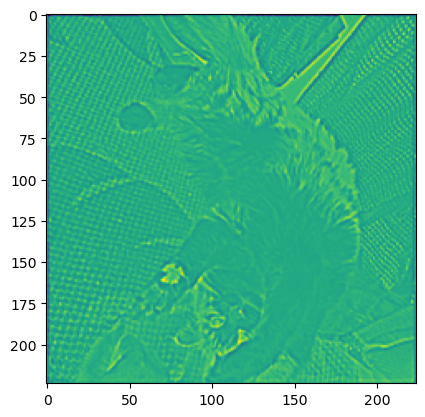

In [461]:
for i in range(40):
    
    img = y1[i, :, :]
    
    img = img.unsqueeze_(2)
    
    plt.imshow(img.detach().numpy())

In [540]:
layer_channel = y[:, :, :]

In [541]:

layer_channel = layer_channel.unsqueeze_(0)

layer_channel.shape

torch.Size([1, 64, 224, 224])

In [550]:
deconv = nn.ConvTranspose2d(64, 1, (3, 3), (1, 1), (1, 1))

In [551]:
dec_y = deconv(layer_channel)

In [552]:
dec_y.shape

torch.Size([1, 1, 224, 224])

In [553]:
dec_y.squeeze_(0)

tensor([[[ 8.4942,  5.6059,  4.3806,  ...,  3.0228,  1.9014,  1.3100],
         [ 8.5685,  3.0162,  1.5665,  ...,  2.3616,  0.4318, -2.3231],
         [ 7.7669,  2.9268,  1.4436,  ...,  2.2161, -0.7707, -0.3176],
         ...,
         [ 5.1432,  2.7917,  2.8156,  ...,  3.3438,  2.1467,  2.5946],
         [ 4.5723,  4.2479,  4.1583,  ...,  4.5415,  3.2085,  3.1517],
         [ 2.7328,  0.7116,  0.0329,  ...,  2.6901,  1.3064,  0.0660]]],
       grad_fn=<SqueezeBackward4>)

In [554]:
dec_y = dec_y.permute(1, 2, 0)

In [555]:
dec_y.shape

torch.Size([224, 224, 1])

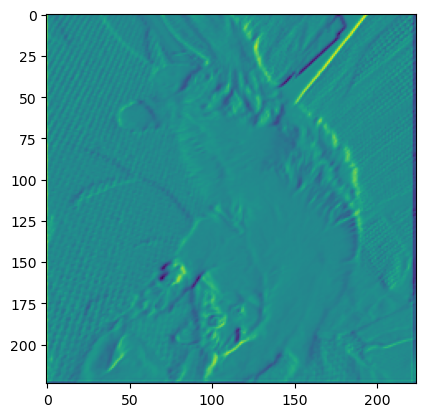

In [557]:
plt.imshow(dec_y.detach().numpy(), )